<a href="https://colab.research.google.com/github/SylviaNice/7162856-G-rez-Git-et-GitHub/blob/main/Projet_BottleNeck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [490]:
# 1. Nettoyage de l'environnement (efface toutes les variables en mémoire)

%reset -f

In [491]:
# 2. Installation des bibliothèques

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [492]:
# 3. Importation des données

from google.colab import files
uploaded = files.upload()

Saving fichier_liaison.xlsx to fichier_liaison (13).xlsx
Saving Fichier_erp.xlsx to Fichier_erp (13).xlsx
Saving Fichier_web.xlsx to Fichier_web (13).xlsx


In [493]:
# 4. Chargement des 3 fichiers

erp_file = "Fichier_erp.xlsx"
web_file = "Fichier_web.xlsx"
liaison_file = "fichier_liaison.xlsx"

In [494]:
# 5. Lecture des fichiers

erp_df = pd.read_excel(erp_file)
web_df = pd.read_excel(web_file)
liaison_df = pd.read_excel(liaison_file)

In [495]:
# FICHIER ERP : APERÇU ET NETTOYAGE DU FICHIER

display(erp_df.head())
print(erp_df.shape)
print(erp_df.dtypes)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


(825, 5)
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object


In [496]:
# Afficher toutes les incohérences dans les stocks fichier erp

stocks_negatifs = erp_df[erp_df['stock_quantity'] < 0]
print("Stocks négatifs :")
print(stocks_negatifs)

Stocks négatifs :
     product_id  onsale_web  price  stock_quantity stock_status
449        4973           0   10.0              -1   outofstock
573        5700           1   44.5              -1   outofstock


In [497]:
# Corriger les stocks négatifs et vérifier leur suppression

erp_df['stock_quantity'] = erp_df['stock_quantity'].abs()
erp_df['stock_quantity'] = erp_df['stock_quantity'].clip(lower=0)
print(erp_df[erp_df['product_id'] == 4973])
erp_df['stock_quantity'] = erp_df['stock_quantity'].abs()
erp_df['stock_quantity'] = erp_df['stock_quantity'].clip(lower=0)
print(erp_df[erp_df['product_id'] == 5700])

     product_id  onsale_web  price  stock_quantity stock_status
449        4973           0   10.0               1   outofstock
     product_id  onsale_web  price  stock_quantity stock_status
573        5700           1   44.5               1   outofstock


In [498]:
# Corriger les prix négatifs et vérifier leur suppression

prix_négatifs = erp_df[erp_df['price'] < 0]
print("Prix négatifs :")
print(prix_négatifs)
erp_df['price'] = erp_df['price'].abs()
prix_négatifs = erp_df[erp_df['price'] < 0]
print("Prix négatifs après correction :")
print(prix_négatifs)

Prix négatifs :
     product_id  onsale_web  price  stock_quantity stock_status
469        5017           0   -8.0               0   outofstock
739        6594           0   -1.0             192      instock
Prix négatifs après correction :
Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status]
Index: []


In [499]:
# Détecter les colonnes avec des valeurs manquantes

missing_columns = erp_df.columns[erp_df.isna().any()].tolist()
print("Colonnes avec des valeurs manquantes :", missing_columns)

Colonnes avec des valeurs manquantes : []


In [500]:
# Détecter les doublons

doublons_erp = erp_df.duplicated(keep=False)
print("Nombre de doublons :", doublons_erp.sum())

Nombre de doublons : 0


In [501]:
# Supprimer les lignes entièrement vides du fichier erp

erp_df.dropna(how='all', inplace=True)
print(erp_df.shape)

(825, 5)


In [502]:
# Enregistrement du fichier nettoyé erp

erp_df.to_excel('Fichier_erp_clean.xlsx', index=False)
files.download("Fichier_erp_clean.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [503]:
# FICHIER LIAISON : APERÇU ET NETTOYAGE DU FICHIER

display(liaison_df.head())
print(liaison_df.shape)
print(liaison_df.dtypes)

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


(825, 2)
product_id     int64
id_web        object
dtype: object


In [504]:
# Corriger l'erreur dans le nom de la colonne

liaison_df = liaison_df.rename(columns={'id_web': 'sku'})
print(liaison_df.columns)

Index(['product_id', 'sku'], dtype='object')


In [505]:
# Visualiser la cellule erreur "bon-cadeau-25-euros"

print(liaison_df.loc[440:449, ['sku']])

                     sku
440                13379
441                15338
442                15337
443  bon-cadeau-25-euros
444                15737
445                15958
446                16515
447                16586
448                11225
449                  NaN


In [506]:
# Remplacer la cellule "bon-cadeau-25-euros" par une cellule vide

liaison_df.loc[443,  'sku'] = ""
print(liaison_df.loc[440:449, ['sku']])

       sku
440  13379
441  15338
442  15337
443       
444  15737
445  15958
446  16515
447  16586
448  11225
449    NaN


In [507]:
# Supprimer les indices -1 dans la colonne 'sku' du fichier final

liaison_df['sku'] = liaison_df['sku'].apply(lambda x: x.strip().replace(r'-1', '') if isinstance(x, str) else x )
print(liaison_df.loc[822:825, ['sku']])

       sku
822  13127
823  14680
824  16230


In [508]:
# Enregistrement du fichier nettoyé liaison

liaison_df.to_excel('fichier_liaison_clean.xlsx', index=False)
files.download("fichier_liaison_clean.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [509]:
# FICHIER WEB : APERÇU ET NETTOYAGE DU FICHIER

display(web_df.head())
print(web_df.shape)
print(web_df.dtypes)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,2018-06-07 14:27:25,NaN,Château du Couvent Pomerol 2017,NaN,publish,closed,closed,NaN,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,2018-02-14 14:39:43,NaN,Parés Baltà Penedès Indigena 2017,Des couleurs et aromes intenses où le fruit et...,publish,closed,closed,NaN,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,2018-02-14 16:15:31,NaN,Maurel Cabardès Tradition 2017,"Un joli nez aux arômes de fruits rouges, de ca...",publish,closed,closed,NaN,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,2020-01-25 13:08:16,NaN,Domaine de la Monardière Vacqueyras Vieilles V...,NaN,publish,closed,closed,NaN,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


(1513, 28)
sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                   

In [510]:
# Supprimer toutes les colonnes complètement vides

web_df = web_df.dropna(axis=1, how='all')
print(web_df.shape)

(1513, 24)


In [511]:
# Supprimer les lignes entièrement vides

web_df.dropna(how='all', inplace=True)
print(web_df.shape)

(1513, 24)


In [512]:
# Supprimer les doublons sur la clé avant la fusion

web_df = web_df.drop_duplicates(subset=['sku'])
print(web_df.shape)
web_df.to_excel('Fichier_web_clean.xlsx', index=False)
files.download("Fichier_web_clean.xlsx")

(715, 24)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [513]:
# Remplacer "bon cadeau 25" par des cellules vides

web_df['sku'] = web_df['sku'].replace("bon-cadeau-25-euros", "")
web_df.to_excel("fichier_nettoye.xlsx", index=False)
files.download("fichier_nettoye.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [514]:
# Supprimer les indices -1 dans la colonne 'sku'

web_df['sku'] = web_df['sku'].apply(lambda x: x.strip().replace(r'-1', '') if isinstance(x, str) else x )
print(web_df['sku'].head())
web_df.to_excel("fichier_nettoye.xlsx", index=False)
files.download("fichier_nettoye.xlsx")

0    16004
1      NaN
2    15075
3    16209
4    15763
Name: sku, dtype: object


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [515]:
# Fusion du fichier erp avec le fichier liaison

erp_df = pd.read_excel("Fichier_erp_clean.xlsx")
liaison_df = pd.read_excel("fichier_liaison_clean.xlsx")
erp_liaison = pd.merge(erp_df, liaison_df, on='product_id', how='inner')
print(erp_liaison)
print(erp_liaison.shape)

     product_id  onsale_web  price  stock_quantity stock_status      sku
0          3847           1   24.2               0   outofstock  15298.0
1          3849           1   34.3               0   outofstock  15296.0
2          3850           1   20.8               0   outofstock  15300.0
3          4032           1   14.1               0   outofstock  19814.0
4          4039           1   46.0               0   outofstock  19815.0
..          ...         ...    ...             ...          ...      ...
820        7203           0   45.0              30      instock      NaN
821        7204           0   45.0               9      instock      NaN
822        7247           1   54.8              23      instock  13127.0
823        7329           0   26.5              14      instock  14680.0
824        7338           1   16.3              45      instock  16230.0

[825 rows x 6 columns]
(825, 6)


In [516]:
# Fusion du fichier erp_liaison et du fichier web

erp_liaison_web = pd.merge(erp_liaison, web_df, on='sku', how='left')
print(erp_liaison_web.shape)
print(erp_liaison_web.dtypes)

(825, 29)
product_id                    int64
onsale_web                    int64
price                       float64
stock_quantity                int64
stock_status                 object
sku                          object
virtual                     float64
downloadable                float64
rating_count                float64
average_rating              float64
total_sales                 float64
tax_status                   object
post_author                 float64
post_date            datetime64[ns]
post_date_gmt        datetime64[ns]
post_title                   object
post_excerpt                 object
post_status                  object
comment_status               object
ping_status                  object
post_name                    object
post_modified        datetime64[ns]
post_modified_gmt    datetime64[ns]
post_parent                 float64
guid                         object
menu_order                  float64
post_type                    object
post_mime_type    

In [517]:
# Enregistrement et téléchargement du nouveau fichier de travail

erp_liaison_web.to_excel("erp_liaison_web.xlsx", index=False)
from google.colab import files
files.download("erp_liaison_web.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [518]:
# Calcul du CA par ligne et par colonne

erp_liaison_web['CA'] = erp_liaison_web['price'] * erp_liaison_web['total_sales']
CA_total = erp_liaison_web['CA'].sum()
print("CA total :", CA_total)
erp_liaison_web.to_excel("erp_liaison_web_CA.xlsx", index=False)
print("Fichier sauvegardé : erp_liaison_web_CA.xlsx")
files.download("erp_liaison_web_CA.xlsx")

CA total : 66822.0
Fichier sauvegardé : erp_liaison_web_CA.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

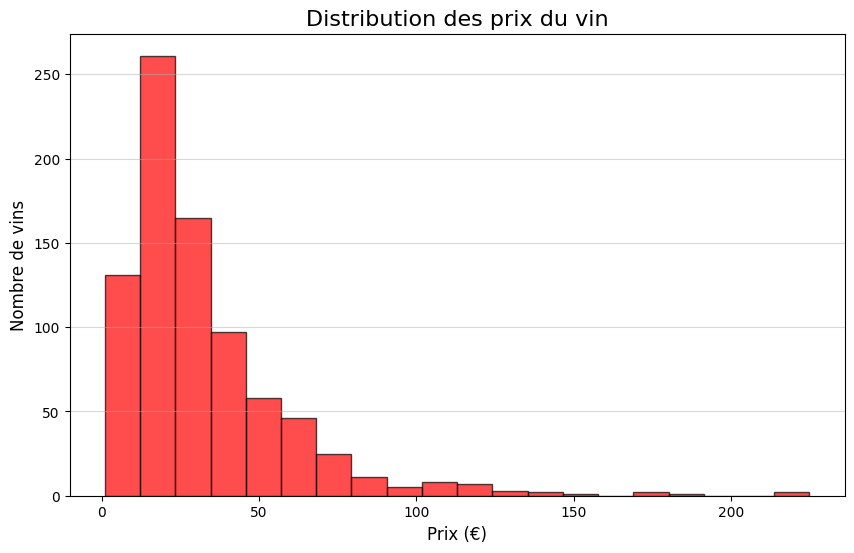

In [519]:
# Distribution des prix du vin

plt.figure(figsize=(10, 6))
plt.hist(erp_liaison_web['price'], bins=20, color='red', edgecolor='black', alpha=0.7)
plt.title("Distribution des prix du vin", fontsize=16)
plt.xlabel("Prix (€)", fontsize=12)
plt.ylabel("Nombre de vins", fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

In [520]:
# Détection des outliers dans les prix

z_scores = zscore(erp_liaison_web['price'])
outlier_idx = np.argsort(np.abs(z_scores))[-10:]
outliers = erp_liaison_web.iloc[outlier_idx]
outliers = outliers.sort_values(by='price', ascending=False)[['post_title', 'price']]
print(outliers)

                                            post_title  price
208     Champagne Egly-Ouriet Grand Cru Millésimé 2008  225.0
460     David Duband Charmes-Chambertin Grand Cru 2014  217.5
635  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...  191.3
227                               Cognac Frapin VIP XO  176.0
598                Camille Giroud Clos de Vougeot 2016  175.0
230  Cognac Frapin Château de Fontpinot 1989 20 Ans...  157.0
242                                                NaN  144.0
411  Domaine Des Croix Corton Charlemagne Grand Cru...  137.0
697             Champagne Gosset Célébris Vintage 2007  135.0
210     Champagne Egly-Ouriet Grand Cru Blanc de Noirs  126.5


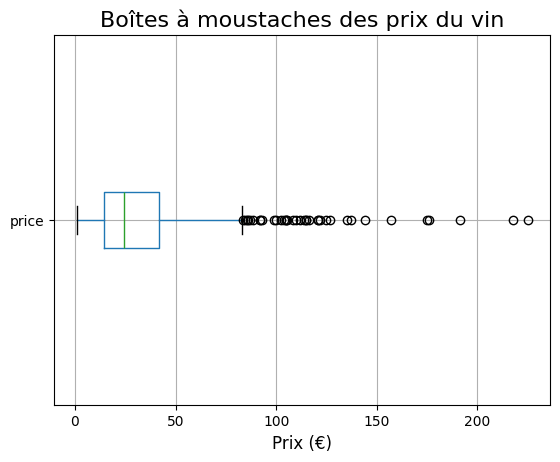

In [521]:
# Représentation graphique des outliers dans les prix du vin

erp_liaison_web.boxplot(column="price", vert=False)
plt.title("Boîtes à moustaches des prix du vin", fontsize=16)
plt.xlabel("Prix (€)", fontsize=12)
plt.show()